In [1]:
import os
from PIL import Image

def convert_images_to_bw(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        file_path = os.path.join(input_folder, filename)
        try:
            with Image.open(file_path) as img:
                bw_img = img.convert('L')
                bw_img.save(os.path.join(output_folder, filename))
                print(f"Converted {filename} to black and white.")
        except Exception as e:
            print(f"Could not process {filename}: {e}")

input_folder = r'C:\Users\dines\Desktop\dataset_two'
output_folder = r'C:\Users\dines\Desktop\input_gray' 

convert_images_to_bw(input_folder, output_folder)


Converted pinterest_259871840969966885.jpg to black and white.
Converted pinterest_259871840970151443.jpg to black and white.
Converted pinterest_259871840970193420.jpg to black and white.
Converted pinterest_259871840970216205.jpg to black and white.
Converted pinterest_259871840970276517.jpg to black and white.
Converted pinterest_259871840970338795.jpg to black and white.
Converted pinterest_259871840970612025.jpg to black and white.
Converted pinterest_259871840970612063.jpg to black and white.
Converted pinterest_259871840970612070.jpg to black and white.
Converted pinterest_259871840970612077.jpg to black and white.
Converted pinterest_259871840970618399.jpg to black and white.
Converted pinterest_259871840970623361.jpg to black and white.
Converted pinterest_259871840970627354.jpg to black and white.
Converted pinterest_259871840970627441.jpg to black and white.
Converted pinterest_259871840970671372.jpg to black and white.
Converted pinterest_259871840970671576.jpg to black and

In [12]:

import cv2
import os
import matplotlib.pyplot as plt

def process_and_show_images(input_folder, output_folder):
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

   
    for image_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, image_name)

        
        if os.path.isfile(input_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Processing {image_name}...")

            
            image = cv2.imread(input_path)

            if image is None:
                print(f"Failed to load {image_name}")
                continue
            bilateral_image = apply_bilateral_filter(image)

            
            save_processed_image( bilateral_image, image_name, output_folder)

            
            show_images_side_by_side(image, bilateral_image, image_name)

def apply_bilateral_filter(image, d=5, sigma_color=10, sigma_space=10):

    bilateral_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)

    return bilateral_image

def save_processed_image( processed, title, output_folder):
   

    

    processed_save_path = os.path.join(output_folder, title)
    cv2.imwrite(processed_save_path, processed)

    print(f"Processed image saved at: {processed_save_path}")

def show_images_side_by_side(original, processed, title):
        print(f"Original: {original.shape}, Processed: {processed.shape}")
 
    # plt.figure(figsize=(10, 5))

   
    # plt.subplot(1, 2, 1)
    # plt.imshow(original, cmap='gray')
    # plt.title(f"Original - {title}")
    # plt.axis('off')  

    
    # plt.subplot(1, 2, 2)
    # plt.imshow(processed, cmap='gray')
    # plt.title(f"Bilateral Filtered - {title}")
    # plt.axis('off')  

    
    # plt.show()

if __name__ == "__main__":
    input_folder = r'C:\Users\dines\Desktop\input_gray' 
    output_folder = r'C:\Users\dines\Desktop\bilateral_gray' 


    process_and_show_images(input_folder, output_folder)

Processing pinterest_259871840969966885.jpg...
Processed image saved at: C:\Users\dines\Desktop\bilateral_gray\pinterest_259871840969966885.jpg
Original: (357, 520, 3), Processed: (357, 520, 3)
Processing pinterest_259871840970151443.jpg...
Processed image saved at: C:\Users\dines\Desktop\bilateral_gray\pinterest_259871840970151443.jpg
Original: (396, 291, 3), Processed: (396, 291, 3)
Processing pinterest_259871840970193420.jpg...
Processed image saved at: C:\Users\dines\Desktop\bilateral_gray\pinterest_259871840970193420.jpg
Original: (450, 964, 3), Processed: (450, 964, 3)
Processing pinterest_259871840970216205.jpg...
Processed image saved at: C:\Users\dines\Desktop\bilateral_gray\pinterest_259871840970216205.jpg
Original: (635, 634, 3), Processed: (635, 634, 3)
Processing pinterest_259871840970276517.jpg...
Processed image saved at: C:\Users\dines\Desktop\bilateral_gray\pinterest_259871840970276517.jpg
Original: (500, 400, 3), Processed: (500, 400, 3)
Processing pinterest_259871840

In [13]:
import cv2
import os
import matplotlib.pyplot as plt

def process_and_show_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for image_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, image_name)

        if os.path.isfile(input_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Processing {image_name}...")
            image = cv2.imread(input_path)

            if image is None:
                print(f"Failed to load {image_name}")
                continue

            clahe_image = apply_clahe(image)
            save_processed_image(clahe_image, image_name, output_folder)
            show_images_side_by_side(image, clahe_image, image_name)

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_image = clahe.apply(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    return clahe_image

def save_processed_image(processed, title, output_folder):
    processed_save_path = os.path.join(output_folder, title)
    cv2.imwrite(processed_save_path, processed)
    print(f"Processed image saved at: {processed_save_path}")

def show_images_side_by_side(original, processed, title):
        print(f"Original: {original.shape}, Processed: {processed.shape}")

    # plt.figure(figsize=(10, 5))
    # plt.subplot(1, 2, 1)
    # plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    # plt.title(f"Original - {title}")
    # plt.axis('off')
    # plt.subplot(1, 2, 2)
    # plt.imshow(processed, cmap='gray')
    # plt.title(f"CLAHE Enhanced - {title}")
    # plt.axis('off')
    # plt.show()

if __name__ == "__main__":
    input_folder = r'C:\Users\dines\Desktop\input_gray'
    output_folder = r'C:\Users\dines\Desktop\clahe_gray'
    process_and_show_images(input_folder, output_folder)



Processing pinterest_259871840969966885.jpg...
Processed image saved at: C:\Users\dines\Desktop\clahe_gray\pinterest_259871840969966885.jpg
Original: (357, 520, 3), Processed: (357, 520)
Processing pinterest_259871840970151443.jpg...
Processed image saved at: C:\Users\dines\Desktop\clahe_gray\pinterest_259871840970151443.jpg
Original: (396, 291, 3), Processed: (396, 291)
Processing pinterest_259871840970193420.jpg...
Processed image saved at: C:\Users\dines\Desktop\clahe_gray\pinterest_259871840970193420.jpg
Original: (450, 964, 3), Processed: (450, 964)
Processing pinterest_259871840970216205.jpg...
Processed image saved at: C:\Users\dines\Desktop\clahe_gray\pinterest_259871840970216205.jpg
Original: (635, 634, 3), Processed: (635, 634)
Processing pinterest_259871840970276517.jpg...
Processed image saved at: C:\Users\dines\Desktop\clahe_gray\pinterest_259871840970276517.jpg
Original: (500, 400, 3), Processed: (500, 400)
Processing pinterest_259871840970338795.jpg...
Processed image sa

In [15]:
#custom guided filter
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def process_and_show_images(input_folder, output_folder):
    """Processes images in the input folder, applies guided filtering, and saves the results."""
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    
    for image_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, image_name)

        
        if os.path.isfile(input_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Processing {image_name}...")

            
            image = cv2.imread(input_path)

            if image is None:
                print(f"Failed to load {image_name}")
                continue

            
        

            
            guided_image = custom_guided_filter(image)

            
            save_processed_image( guided_image, image_name, output_folder)

            
            show_images_side_by_side(image, guided_image, image_name)

def custom_guided_filter(image, radius=5, epsilon=0.01):
    """Custom implementation of the guided filter."""
    I = image.astype(np.float32) / 255.0
    P = I

    
    mean_I = cv2.boxFilter(I, -1, (radius, radius))
    mean_P = cv2.boxFilter(P, -1, (radius, radius))
    mean_IP = cv2.boxFilter(I * P, -1, (radius, radius))
    mean_II = cv2.boxFilter(I * I, -1, (radius, radius))

    
    cov_IP = mean_IP - mean_I * mean_P
    var_I = mean_II - mean_I * mean_I

    
    a = cov_IP / (var_I + epsilon)
    b = mean_P - a * mean_I

    
    mean_a = cv2.boxFilter(a, -1, (radius, radius))
    mean_b = cv2.boxFilter(b, -1, (radius, radius))

    
    output = mean_a * I + mean_b

    
    output = np.clip(output * 255, 0, 255).astype(np.uint8)

    return output

def save_processed_image(processed, title, output_folder):

    

    
    
    processed_save_path = os.path.join(output_folder, title)
    cv2.imwrite(processed_save_path, processed)

    print(f"Processed image saved at: {processed_save_path}")

def show_images_side_by_side(original, processed, title):
        print(f"Original: {original.shape}, Processed: {processed.shape}")

    
    # plt.figure(figsize=(10, 5))

    
    # plt.subplot(1, 2, 1)
    # plt.imshow(original, cmap='gray')
    # plt.title(f"Original - {title}")
    # plt.axis('off')  

    
    # plt.subplot(1, 2, 2)
    # plt.imshow(processed, cmap='gray')
    # plt.title(f"Guided Filtered - {title}")
    # plt.axis('off')  

    
    # plt.show()

if __name__ == "__main__":
    input_folder = r'C:\Users\dines\Desktop\input_gray' 
    output_folder = r'C:\Users\dines\Desktop\guided_filter_gray'
 

    
    process_and_show_images(input_folder, output_folder)


Processing pinterest_259871840969966885.jpg...
Processed image saved at: C:\Users\dines\Desktop\guided_filter_gray\pinterest_259871840969966885.jpg
Original: (357, 520, 3), Processed: (357, 520, 3)
Processing pinterest_259871840970151443.jpg...
Processed image saved at: C:\Users\dines\Desktop\guided_filter_gray\pinterest_259871840970151443.jpg
Original: (396, 291, 3), Processed: (396, 291, 3)
Processing pinterest_259871840970193420.jpg...
Processed image saved at: C:\Users\dines\Desktop\guided_filter_gray\pinterest_259871840970193420.jpg
Original: (450, 964, 3), Processed: (450, 964, 3)
Processing pinterest_259871840970216205.jpg...
Processed image saved at: C:\Users\dines\Desktop\guided_filter_gray\pinterest_259871840970216205.jpg
Original: (635, 634, 3), Processed: (635, 634, 3)
Processing pinterest_259871840970276517.jpg...
Processed image saved at: C:\Users\dines\Desktop\guided_filter_gray\pinterest_259871840970276517.jpg
Original: (500, 400, 3), Processed: (500, 400, 3)
Processing

In [16]:
import os
import requests
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import applications
from keras.models import load_model

BATCH_SIZE = 1

def download_file(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)

def setup_model():
    if not os.path.exists("MODEL"):
        os.makedirs("MODEL")
    model_path = "MODEL/my_model_colorization.h5"
    model_url = "http://dev.ipol.im/~lraad/chromaGAN/model/my_model_colorization.h5"
    if not os.path.isfile(model_path):
        print("Downloading the model...")
        download_file(model_url, model_path)
    else:
        print("Model already exists.")

class DATA():
    def __init__(self, dirname):
        self.dir_path = dirname
        self.filelist = [f for f in os.listdir(self.dir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.batch_size = BATCH_SIZE
        self.size = len(self.filelist)
        self.data_index = 0

    def read_img(self, filename):
        IMAGE_SIZE = 224
        MAX_SIDE = 1500
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Unable to read image: {filename}")
            return False, None, None, None, None
        height, width, _ = img.shape
        if height > MAX_SIDE or width > MAX_SIDE:
            r = min(MAX_SIDE / height, MAX_SIDE / width)
            img = cv2.resize(img, (math.floor(width * r), math.floor(height * r)))
            print(f"Resized image to {img.shape[:2]}")
        labimg = cv2.cvtColor(cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE)), cv2.COLOR_BGR2Lab)
        labimg_ori = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
        return True, np.expand_dims(labimg[:, :, 0], axis=-1), labimg[:, :, 1:], img, np.expand_dims(labimg_ori[:, :, 0], axis=-1)

    def generate_batch(self):
        batch, labels, filelist, originalList, labimg_oritList = [], [], [], [], []
        for i in range(self.batch_size):
            filename = os.path.join(self.dir_path, self.filelist[self.data_index])
            ok, greyimg, colorimg, original, labimg_ori = self.read_img(filename)
            if ok:
                filelist.append(self.filelist[self.data_index])
                batch.append(greyimg)
                labels.append(colorimg)
                originalList.append(original)
                labimg_oritList.append(labimg_ori)
            self.data_index = (self.data_index + 1) % self.size
        return np.array(batch) / 255, np.array(labels) / 255, filelist, np.array(originalList), np.array(labimg_oritList) / 255

def deprocess(imgs):
    imgs = imgs * 255
    imgs = np.clip(imgs, 0, 255)
    return imgs.astype(np.uint8)

def reconstruct(batchX, predictedY):
    if batchX.shape[:2] != predictedY.shape[:2]:
        predictedY = cv2.resize(predictedY, (batchX.shape[1], batchX.shape[0]))
    result = np.concatenate((batchX, predictedY), axis=-1)
    return cv2.cvtColor(result, cv2.COLOR_Lab2BGR)

def show_image(image):
     print("image colurized")
    # plt.imshow(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

def sample_images(input_folder, output_folder):
    save_path = os.path.join("MODEL", "my_model_colorization.h5")
    colorizationModel = load_model(save_path)
    test_data = DATA(input_folder)

    if test_data.size == 0:
        raise ValueError("No images found in the input folder.")
    if BATCH_SIZE > test_data.size:
        raise ValueError("Batch size exceeds the number of images in the input folder.")

    total_batch = int(test_data.size / BATCH_SIZE)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for b in range(total_batch):
        batchX, batchY, filelist, original, labimg_oritList = test_data.generate_batch()
        if batchX.any():
            predY, _ = colorizationModel.predict(np.tile(batchX, [1, 1, 1, 3]))
            for i in range(BATCH_SIZE):
                predY_2 = deprocess(predY[i])
                predResult_2 = reconstruct(deprocess(labimg_oritList[i]), predY_2)
                save_path = os.path.join(output_folder, filelist[i])
                cv2.imwrite(save_path, predResult_2)
                print(f"Saved colorized image to {save_path}")

if __name__ == '__main__':
    input_folder = r'C:\Users\dines\Desktop\input_gray'
    output_folder = r'C:\Users\dines\Desktop\input_colour'
    setup_model()
    sample_images(input_folder, output_folder)



Model already exists.


c:\Users\dines\Desktop\courseproject_it204\vs_code\myenv\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840969966885.jpg
Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840970151443.jpg
Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840970193420.jpg
Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840970216205.jpg
Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840970276517.jpg
Resized image to (1500, 1003)
Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840970338795.jpg
Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840970612025.jpg
Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840970612063.jpg
Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840970612070.jpg
Saved colorized image to C:\Users\dines\Desktop\input_colour\pinterest_259871840970612077.jpg
Saved colorized image to C:\Us

In [1]:
import os
import requests
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import applications
from keras.models import load_model

BATCH_SIZE = 1

def download_file(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)

def setup_model():
    if not os.path.exists("MODEL"):
        os.makedirs("MODEL")
    model_path = "MODEL/my_model_colorization.h5"
    model_url = "http://dev.ipol.im/~lraad/chromaGAN/model/my_model_colorization.h5"
    if not os.path.isfile(model_path):
        print("Downloading the model...")
        download_file(model_url, model_path)
    else:
        print("Model already exists.")

class DATA():
    def __init__(self, dirname):
        self.dir_path = dirname
        self.filelist = [f for f in os.listdir(self.dir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.batch_size = BATCH_SIZE
        self.size = len(self.filelist)
        self.data_index = 0

    def read_img(self, filename):
        IMAGE_SIZE = 224
        MAX_SIDE = 1500
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Unable to read image: {filename}")
            return False, None, None, None, None
        height, width, _ = img.shape
        if height > MAX_SIDE or width > MAX_SIDE:
            r = min(MAX_SIDE / height, MAX_SIDE / width)
            img = cv2.resize(img, (math.floor(width * r), math.floor(height * r)))
            print(f"Resized image to {img.shape[:2]}")
        labimg = cv2.cvtColor(cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE)), cv2.COLOR_BGR2Lab)
        labimg_ori = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
        return True, np.expand_dims(labimg[:, :, 0], axis=-1), labimg[:, :, 1:], img, np.expand_dims(labimg_ori[:, :, 0], axis=-1)

    def generate_batch(self):
        batch, labels, filelist, originalList, labimg_oritList = [], [], [], [], []
        for i in range(self.batch_size):
            filename = os.path.join(self.dir_path, self.filelist[self.data_index])
            ok, greyimg, colorimg, original, labimg_ori = self.read_img(filename)
            if ok:
                filelist.append(self.filelist[self.data_index])
                batch.append(greyimg)
                labels.append(colorimg)
                originalList.append(original)
                labimg_oritList.append(labimg_ori)
            self.data_index = (self.data_index + 1) % self.size
        return np.array(batch) / 255, np.array(labels) / 255, filelist, np.array(originalList), np.array(labimg_oritList) / 255

def deprocess(imgs):
    imgs = imgs * 255
    imgs = np.clip(imgs, 0, 255)
    return imgs.astype(np.uint8)

def reconstruct(batchX, predictedY):
    if batchX.shape[:2] != predictedY.shape[:2]:
        predictedY = cv2.resize(predictedY, (batchX.shape[1], batchX.shape[0]))
    result = np.concatenate((batchX, predictedY), axis=-1)
    return cv2.cvtColor(result, cv2.COLOR_Lab2BGR)

def show_image(image):
     print("image colurized")
    # plt.imshow(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

def sample_images(input_folder, output_folder):
    save_path = os.path.join("MODEL", "my_model_colorization.h5")
    colorizationModel = load_model(save_path)
    test_data = DATA(input_folder)

    if test_data.size == 0:
        raise ValueError("No images found in the input folder.")
    if BATCH_SIZE > test_data.size:
        raise ValueError("Batch size exceeds the number of images in the input folder.")

    total_batch = int(test_data.size / BATCH_SIZE)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for b in range(total_batch):
        batchX, batchY, filelist, original, labimg_oritList = test_data.generate_batch()
        if batchX.any():
            predY, _ = colorizationModel.predict(np.tile(batchX, [1, 1, 1, 3]))
            for i in range(BATCH_SIZE):
                predY_2 = deprocess(predY[i])
                predResult_2 = reconstruct(deprocess(labimg_oritList[i]), predY_2)
                save_path = os.path.join(output_folder, filelist[i])
                cv2.imwrite(save_path, predResult_2)
                print(f"Saved colorized image to {save_path}")

if __name__ == '__main__':
    input_folder = r'C:\Users\dines\Desktop\guided_filter_gray'
    output_folder = r'C:\Users\dines\Desktop\guided_filter_color'
    setup_model()
    sample_images(input_folder, output_folder)


Model already exists.





Using TensorFlow backend.














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




c:\Users\dines\Desktop\courseproject_it204\vs_code\myenv\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Saved colorized image to C:\Users\dines\Desktop\guided_filter_color\pinterest_259871840969966885.jpg
Saved colorized image to C:\Users\dines\Desktop\guided_filter_color\pinterest_259871840970151443.jpg
Saved colorized image to C:\Users\dines\Desktop\guided_filter_color\pinterest_259871840970193420.jpg
Saved colorized image to C:\Users\dines\Desktop\guided_filter_color\pinterest_259871840970216205.jpg
Saved colorized image to C:\Users\dines\Desktop\guided_filter_color\pinterest_259871840970276517.jpg
Resized image to (1500, 1003)
Saved colorized image to C:\Users\dines\Desktop\guided_filter_color\pinterest_259871840970338795.jpg
Saved colorized image to C:\Users\dines\Desktop\guided_filter_color\pinterest_259871840970612025.jpg
Saved colorized image to C:\Users\dines\Desktop\guided_filter_color\pinterest_259871840970612063.jpg
Saved colorized image to C:\Users\dines\Desktop\guided_filter_color\pinterest_259871840970612070.jpg
Saved colorized image to C:\Users\dines\Desktop\guided_filter

In [1]:
import os
import requests
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import applications
from keras.models import load_model

BATCH_SIZE = 1

def download_file(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)

def setup_model():
    if not os.path.exists("MODEL"):
        os.makedirs("MODEL")
    model_path = "MODEL/my_model_colorization.h5"
    model_url = "http://dev.ipol.im/~lraad/chromaGAN/model/my_model_colorization.h5"
    if not os.path.isfile(model_path):
        print("Downloading the model...")
        download_file(model_url, model_path)
    else:
        print("Model already exists.")

class DATA():
    def __init__(self, dirname):
        self.dir_path = dirname
        self.filelist = [f for f in os.listdir(self.dir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.batch_size = BATCH_SIZE
        self.size = len(self.filelist)
        self.data_index = 0

    def read_img(self, filename):
        IMAGE_SIZE = 224
        MAX_SIDE = 1500
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Unable to read image: {filename}")
            return False, None, None, None, None
        height, width, _ = img.shape
        if height > MAX_SIDE or width > MAX_SIDE:
            r = min(MAX_SIDE / height, MAX_SIDE / width)
            img = cv2.resize(img, (math.floor(width * r), math.floor(height * r)))
            print(f"Resized image to {img.shape[:2]}")
        labimg = cv2.cvtColor(cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE)), cv2.COLOR_BGR2Lab)
        labimg_ori = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
        return True, np.expand_dims(labimg[:, :, 0], axis=-1), labimg[:, :, 1:], img, np.expand_dims(labimg_ori[:, :, 0], axis=-1)

    def generate_batch(self):
        batch, labels, filelist, originalList, labimg_oritList = [], [], [], [], []
        for i in range(self.batch_size):
            filename = os.path.join(self.dir_path, self.filelist[self.data_index])
            ok, greyimg, colorimg, original, labimg_ori = self.read_img(filename)
            if ok:
                filelist.append(self.filelist[self.data_index])
                batch.append(greyimg)
                labels.append(colorimg)
                originalList.append(original)
                labimg_oritList.append(labimg_ori)
            self.data_index = (self.data_index + 1) % self.size
        return np.array(batch) / 255, np.array(labels) / 255, filelist, np.array(originalList), np.array(labimg_oritList) / 255

def deprocess(imgs):
    imgs = imgs * 255
    imgs = np.clip(imgs, 0, 255)
    return imgs.astype(np.uint8)

def reconstruct(batchX, predictedY):
    if batchX.shape[:2] != predictedY.shape[:2]:
        predictedY = cv2.resize(predictedY, (batchX.shape[1], batchX.shape[0]))
    result = np.concatenate((batchX, predictedY), axis=-1)
    return cv2.cvtColor(result, cv2.COLOR_Lab2BGR)

def show_image(image):
     print("image colurized")
    # plt.imshow(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

def sample_images(input_folder, output_folder):
    save_path = os.path.join("MODEL", "my_model_colorization.h5")
    colorizationModel = load_model(save_path)
    test_data = DATA(input_folder)

    if test_data.size == 0:
        raise ValueError("No images found in the input folder.")
    if BATCH_SIZE > test_data.size:
        raise ValueError("Batch size exceeds the number of images in the input folder.")

    total_batch = int(test_data.size / BATCH_SIZE)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for b in range(total_batch):
        batchX, batchY, filelist, original, labimg_oritList = test_data.generate_batch()
        if batchX.any():
            predY, _ = colorizationModel.predict(np.tile(batchX, [1, 1, 1, 3]))
            for i in range(BATCH_SIZE):
                predY_2 = deprocess(predY[i])
                predResult_2 = reconstruct(deprocess(labimg_oritList[i]), predY_2)
                save_path = os.path.join(output_folder, filelist[i])
                cv2.imwrite(save_path, predResult_2)
                print(f"Saved colorized image to {save_path}")

if __name__ == '__main__':
    input_folder = r'C:\Users\dines\Desktop\bilateral_gray'
    output_folder = r'C:\Users\dines\Desktop\bilateral_color'
    setup_model()
    sample_images(input_folder, output_folder)



Model already exists.





Using TensorFlow backend.














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




c:\Users\dines\Desktop\courseproject_it204\vs_code\myenv\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840969966885.jpg
Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840970151443.jpg
Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840970193420.jpg
Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840970216205.jpg
Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840970276517.jpg
Resized image to (1500, 1003)
Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840970338795.jpg
Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840970612025.jpg
Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840970612063.jpg
Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840970612070.jpg
Saved colorized image to C:\Users\dines\Desktop\bilateral_color\pinterest_259871840970612077.jpg


In [2]:
import os
import requests
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import applications
from keras.models import load_model

BATCH_SIZE = 1

def download_file(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)

def setup_model():
    if not os.path.exists("MODEL"):
        os.makedirs("MODEL")
    model_path = "MODEL/my_model_colorization.h5"
    model_url = "http://dev.ipol.im/~lraad/chromaGAN/model/my_model_colorization.h5"
    if not os.path.isfile(model_path):
        print("Downloading the model...")
        download_file(model_url, model_path)
    else:
        print("Model already exists.")

class DATA():
    def __init__(self, dirname):
        self.dir_path = dirname
        self.filelist = [f for f in os.listdir(self.dir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.batch_size = BATCH_SIZE
        self.size = len(self.filelist)
        self.data_index = 0

    def read_img(self, filename):
        IMAGE_SIZE = 224
        MAX_SIDE = 1500
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Unable to read image: {filename}")
            return False, None, None, None, None
        height, width, _ = img.shape
        if height > MAX_SIDE or width > MAX_SIDE:
            r = min(MAX_SIDE / height, MAX_SIDE / width)
            img = cv2.resize(img, (math.floor(width * r), math.floor(height * r)))
            print(f"Resized image to {img.shape[:2]}")
        labimg = cv2.cvtColor(cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE)), cv2.COLOR_BGR2Lab)
        labimg_ori = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
        return True, np.expand_dims(labimg[:, :, 0], axis=-1), labimg[:, :, 1:], img, np.expand_dims(labimg_ori[:, :, 0], axis=-1)

    def generate_batch(self):
        batch, labels, filelist, originalList, labimg_oritList = [], [], [], [], []
        for i in range(self.batch_size):
            filename = os.path.join(self.dir_path, self.filelist[self.data_index])
            ok, greyimg, colorimg, original, labimg_ori = self.read_img(filename)
            if ok:
                filelist.append(self.filelist[self.data_index])
                batch.append(greyimg)
                labels.append(colorimg)
                originalList.append(original)
                labimg_oritList.append(labimg_ori)
            self.data_index = (self.data_index + 1) % self.size
        return np.array(batch) / 255, np.array(labels) / 255, filelist, np.array(originalList), np.array(labimg_oritList) / 255

def deprocess(imgs):
    imgs = imgs * 255
    imgs = np.clip(imgs, 0, 255)
    return imgs.astype(np.uint8)

def reconstruct(batchX, predictedY):
    if batchX.shape[:2] != predictedY.shape[:2]:
        predictedY = cv2.resize(predictedY, (batchX.shape[1], batchX.shape[0]))
    result = np.concatenate((batchX, predictedY), axis=-1)
    return cv2.cvtColor(result, cv2.COLOR_Lab2BGR)

def show_image(image):
     print("image colurized")
    # plt.imshow(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

def sample_images(input_folder, output_folder):
    save_path = os.path.join("MODEL", "my_model_colorization.h5")
    colorizationModel = load_model(save_path)
    test_data = DATA(input_folder)

    if test_data.size == 0:
        raise ValueError("No images found in the input folder.")
    if BATCH_SIZE > test_data.size:
        raise ValueError("Batch size exceeds the number of images in the input folder.")

    total_batch = int(test_data.size / BATCH_SIZE)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for b in range(total_batch):
        batchX, batchY, filelist, original, labimg_oritList = test_data.generate_batch()
        if batchX.any():
            predY, _ = colorizationModel.predict(np.tile(batchX, [1, 1, 1, 3]))
            for i in range(BATCH_SIZE):
                predY_2 = deprocess(predY[i])
                predResult_2 = reconstruct(deprocess(labimg_oritList[i]), predY_2)
                save_path = os.path.join(output_folder, filelist[i])
                cv2.imwrite(save_path, predResult_2)
                print(f"Saved colorized image to {save_path}")

if __name__ == '__main__':
    input_folder =  r'C:\Users\dines\Desktop\clahe_gray'
    output_folder = r'C:\Users\dines\Desktop\clahe_color'
    setup_model()
    sample_images(input_folder, output_folder)



Model already exists.


c:\Users\dines\Desktop\courseproject_it204\vs_code\myenv\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840969966885.jpg
Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840970151443.jpg
Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840970193420.jpg
Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840970216205.jpg
Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840970276517.jpg
Resized image to (1500, 1003)
Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840970338795.jpg
Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840970612025.jpg
Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840970612063.jpg
Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840970612070.jpg
Saved colorized image to C:\Users\dines\Desktop\clahe_color\pinterest_259871840970612077.jpg
Saved colorized image to C:\Users\dines\

In [3]:
def calculate_metrics(folder1, folder2):
    ssim_scores = []
    psnr_scores = []
    filenames = []

    for filename in os.listdir(folder1):
        if filename in os.listdir(folder2):
            img1_path = os.path.join(folder1, filename)
            img2_path = os.path.join(folder2, filename)
            
            img1 = cv2.imread(img1_path)
            img2 = cv2.imread(img2_path)
            
            if img1 is None or img2 is None:
                print(f"Unable to read images: {filename}")
                continue

            if img1.shape != img2.shape:
                img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
            
            gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
            gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
            
            ssim_value = ssim(gray_img1, gray_img2)
            psnr_value = calculate_psnr(img1, img2)

            filenames.append(filename)
            ssim_scores.append(ssim_value)
            psnr_scores.append(psnr_value)

    print(f"Processed {len(filenames)} images from {folder1} and {folder2}.")  # Add this line
    return filenames, ssim_scores, psnr_scores



In [7]:
import os
import cv2
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from math import log10, sqrt


def calculate_psnr(original, processed):
    mse = ((original - processed) ** 2).mean()
    if mse == 0: 
        return 100
    max_pixel = 255.0
    psnr_value = 20 * log10(max_pixel / sqrt(mse))
    return psnr_value


original_dir = r"C:\Users\dines\Desktop\dataset_two"
input_colour_dir = r"C:\Users\dines\Desktop\input_colour"
guided_filter_color_dir = r"C:\Users\dines\Desktop\guided_filter_color"
bilateral_filter_color_dir = r"C:\Users\dines\Desktop\bilateral_color"
clahe_filter_color_dir = r"C:\Users\dines\Desktop\clahe_color"


directories = [original_dir, input_colour_dir, guided_filter_color_dir, bilateral_filter_color_dir, clahe_filter_color_dir]
for dir_path in directories:
    if not os.path.isdir(dir_path):
        print(f"Directory does not exist: {dir_path}")
        exit(1)


columns = [
    'Image', 
    'SSIM_Input_Colour', 'PSNR_Input_Colour', 
    'SSIM_Guided_Filter', 'PSNR_Guided_Filter',
    'SSIM_Bilateral_Filter', 'PSNR_Bilateral_Filter', 
    'SSIM_Clahe_Filter', 'PSNR_Clahe_Filter'
]
results = []


original_images = sorted(os.listdir(original_dir))
print(f"Number of original images found: {len(original_images)}")


def is_image_file(filename):
    image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.tiff']
    return any(filename.lower().endswith(ext) for ext in image_extensions)

original_images = [img for img in original_images if is_image_file(img)]
print(f"Number of image files after filtering: {len(original_images)}")


for idx, img_name in enumerate(original_images, 1):
    print(f"Processing image {idx}/{len(original_images)}: {img_name}")
    

    original_img_path = os.path.join(original_dir, img_name)
    original_img = cv2.imread(original_img_path)
    
    if original_img is None:
        print(f"Failed to read original image: {original_img_path}")
        continue

    original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

  
    processed_images = {}
    processed_dirs = {
        'Input_Colour': input_colour_dir,
        'Guided_Filter': guided_filter_color_dir,
        'Bilateral_Filter': bilateral_filter_color_dir,
        'Clahe_Filter': clahe_filter_color_dir
    }

    skip_image = False
    for key, proc_dir in processed_dirs.items():
        proc_img_path = os.path.join(proc_dir, img_name)
        processed_img = cv2.imread(proc_img_path)
        if processed_img is None:
            print(f"Failed to read {key} image: {proc_img_path}")
            skip_image = True
            break
        processed_images[key] = processed_img

    if skip_image:
        print(f"Skipping image due to missing processed versions: {img_name}")
        continue

 
    try:
        ssim_input_colour = ssim(original_img, processed_images['Input_Colour'],multichannel=True)
        ssim_guided_filter = ssim(original_img, processed_images['Guided_Filter'],multichannel=True)
        ssim_bilateral_filter = ssim(original_img, processed_images['Bilateral_Filter'],multichannel=True)
        ssim_clahe_filter = ssim(original_img, processed_images['Clahe_Filter'],multichannel=True)
    except Exception as e:
        print(f"Error calculating SSIM for {img_name}: {e}")
        continue

    
    try:
        psnr_input_colour = calculate_psnr(original_img, processed_images['Input_Colour'])
        psnr_guided_filter = calculate_psnr(original_img, processed_images['Guided_Filter'])
        psnr_bilateral_filter = calculate_psnr(original_img, processed_images['Bilateral_Filter'])
        psnr_clahe_filter = calculate_psnr(original_img, processed_images['Clahe_Filter'])
    except Exception as e:
        print(f"Error calculating PSNR for {img_name}: {e}")
        continue

 
    results.append([
        img_name, 
        ssim_input_colour, psnr_input_colour, 
        ssim_guided_filter, psnr_guided_filter,
        ssim_bilateral_filter, psnr_bilateral_filter, 
        ssim_clahe_filter, psnr_clahe_filter
    ])


if not results:
    print("No SSIM or PSNR values were calculated. Please check the image paths and filenames.")
    exit(1)


df = pd.DataFrame(results, columns=columns)


output_csv_path = r"C:\Users\dines\Desktop\comparison_results.csv"
try:
    df.to_csv(output_csv_path, index=False)
    print(f"SSIM and PSNR values saved to {output_csv_path}")
except Exception as e:
    print(f"Failed to save CSV: {e}")


Number of original images found: 1163
Number of image files after filtering: 1157
Processing image 1/1157: pinterest_259871840969966885.jpg
Processing image 2/1157: pinterest_259871840970151443.jpg
Processing image 3/1157: pinterest_259871840970193420.jpg
Processing image 4/1157: pinterest_259871840970216205.jpg
Processing image 5/1157: pinterest_259871840970276517.jpg
Processing image 6/1157: pinterest_259871840970338795.jpg
Error calculating SSIM for pinterest_259871840970338795.jpg: Input images must have the same dimensions.
Processing image 7/1157: pinterest_259871840970612025.jpg
Processing image 8/1157: pinterest_259871840970612063.jpg
Processing image 9/1157: pinterest_259871840970612070.jpg
Processing image 10/1157: pinterest_259871840970612077.jpg
Processing image 11/1157: pinterest_259871840970618399.jpg
Processing image 12/1157: pinterest_259871840970623361.jpg
Processing image 13/1157: pinterest_259871840970627354.jpg
Processing image 14/1157: pinterest_259871840970627441.

Number of original images found: 1163
Number of image files after filtering: 1157

Processing image 1/1157: pinterest_259871840969966885.jpg
  [Success] Calculated SSIM and PSNR for: pinterest_259871840969966885.jpg

Processing image 2/1157: pinterest_259871840970151443.jpg
  [Success] Calculated SSIM and PSNR for: pinterest_259871840970151443.jpg

Processing image 3/1157: pinterest_259871840970193420.jpg
  [Success] Calculated SSIM and PSNR for: pinterest_259871840970193420.jpg

Processing image 4/1157: pinterest_259871840970216205.jpg
  [Success] Calculated SSIM and PSNR for: pinterest_259871840970216205.jpg

Processing image 5/1157: pinterest_259871840970276517.jpg
  [Success] Calculated SSIM and PSNR for: pinterest_259871840970276517.jpg

Processing image 6/1157: pinterest_259871840970338795.jpg
  [Error] Calculating SSIM for pinterest_259871840970338795.jpg: Input images must have the same dimensions.
Processing image 7/1157: pinterest_259871840970612025.jpg
  [Success] Calculated

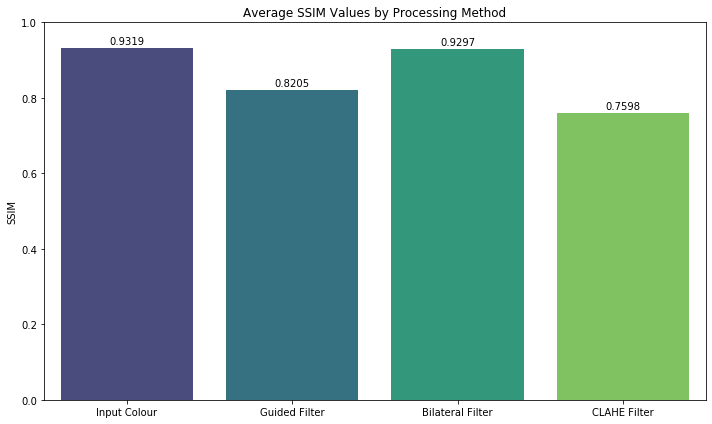

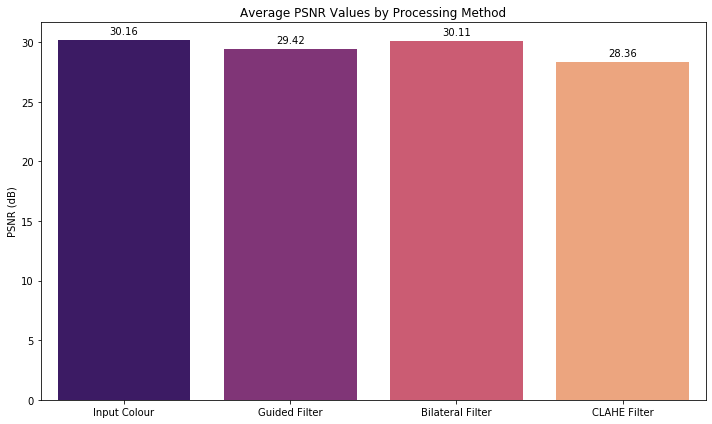

In [10]:
import os
import cv2
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from math import log10, sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate PSNR
def calculate_psnr(original, processed):
    mse = ((original - processed) ** 2).mean()
    if mse == 0:  # MSE is zero means no noise in the signal
        return 100
    max_pixel = 255.0
    psnr_value = 20 * log10(max_pixel / sqrt(mse))
    return psnr_value

# Paths to your directories
original_dir = r"C:\Users\dines\Desktop\dataset_two"
input_colour_dir = r"C:\Users\dines\Desktop\input_colour"
guided_filter_color_dir = r"C:\Users\dines\Desktop\guided_filter_color"
bilateral_filter_color_dir = r"C:\Users\dines\Desktop\bilateral_color"
clahe_filter_color_dir = r"C:\Users\dines\Desktop\clahe_color"

# Verify directories exist
directories = [original_dir, input_colour_dir, guided_filter_color_dir, bilateral_filter_color_dir, clahe_filter_color_dir]
for dir_path in directories:
    if not os.path.isdir(dir_path):
        print(f"Directory does not exist: {dir_path}")
        exit(1)

# Prepare DataFrame to store the results
columns = [
    'Image', 
    'SSIM_Input_Colour', 'PSNR_Input_Colour', 
    'SSIM_Guided_Filter', 'PSNR_Guided_Filter',
    'SSIM_Bilateral_Filter', 'PSNR_Bilateral_Filter', 
    'SSIM_Clahe_Filter', 'PSNR_Clahe_Filter'
]
results = []

# Get the list of images
original_images = sorted(os.listdir(original_dir))
print(f"Number of original images found: {len(original_images)}")

# Function to check if file is an image based on extension
def is_image_file(filename):
    image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.tiff']
    return any(filename.lower().endswith(ext) for ext in image_extensions)

original_images = [img for img in original_images if is_image_file(img)]
print(f"Number of image files after filtering: {len(original_images)}\n")

# Loop through the images and calculate SSIM and PSNR
for idx, img_name in enumerate(original_images, 1):
    print(f"Processing image {idx}/{len(original_images)}: {img_name}")
    
    # Read original image
    original_img_path = os.path.join(original_dir, img_name)
    original_img = cv2.imread(original_img_path)
    
    if original_img is None:
        print(f"  [Error] Failed to read original image: {original_img_path}")
        continue

    

    # Initialize a dictionary to hold processed images
    processed_images = {}
    processed_dirs = {
        'Input_Colour': input_colour_dir,
        'Guided_Filter': guided_filter_color_dir,
        'Bilateral_Filter': bilateral_filter_color_dir,
        'Clahe_Filter': clahe_filter_color_dir
    }

    skip_image = False
    for key, proc_dir in processed_dirs.items():
        proc_img_path = os.path.join(proc_dir, img_name)
        processed_img = cv2.imread(proc_img_path)
        if processed_img is None:
            print(f"  [Error] Failed to read {key} image: {proc_img_path}")
            skip_image = True
            break
        processed_images[key] = processed_img

    if skip_image:
        print(f"  [Skipped] Missing or unreadable processed images for: {img_name}\n")
        continue

    # Calculate SSIM
    try:
     ssim_input_colour = ssim(original_img, processed_images['Input_Colour'], multichannel=True)
     ssim_guided_filter = ssim(original_img, processed_images['Guided_Filter'], multichannel=True)
     ssim_bilateral_filter = ssim(original_img, processed_images['Bilateral_Filter'], multichannel=True)
     ssim_clahe_filter = ssim(original_img, processed_images['Clahe_Filter'], multichannel=True)
    except Exception as e:
        print(f"  [Error] Calculating SSIM for {img_name}: {e}")
        continue

    # Calculate PSNR
    try:
        psnr_input_colour = calculate_psnr(original_img, processed_images['Input_Colour'])
        psnr_guided_filter = calculate_psnr(original_img, processed_images['Guided_Filter'])
        psnr_bilateral_filter = calculate_psnr(original_img, processed_images['Bilateral_Filter'])
        psnr_clahe_filter = calculate_psnr(original_img, processed_images['Clahe_Filter'])
    except Exception as e:
        print(f"  [Error] Calculating PSNR for {img_name}: {e}")
        continue

    # Append the results
    results.append([
        img_name, 
        ssim_input_colour, psnr_input_colour, 
        ssim_guided_filter, psnr_guided_filter,
        ssim_bilateral_filter, psnr_bilateral_filter, 
        ssim_clahe_filter, psnr_clahe_filter
    ])
    print(f"  [Success] Calculated SSIM and PSNR for: {img_name}\n")

# Check if results were collected
if not results:
    print("No SSIM or PSNR values were calculated. Please check the image paths and filenames.")
    exit(1)

# Create DataFrame
df = pd.DataFrame(results, columns=columns)

# Calculate average SSIM and PSNR for each processing method
average_row = {
    'Image': 'Average',
    'SSIM_Input_Colour': df['SSIM_Input_Colour'].mean(),
    'PSNR_Input_Colour': df['PSNR_Input_Colour'].mean(),
    'SSIM_Guided_Filter': df['SSIM_Guided_Filter'].mean(),
    'PSNR_Guided_Filter': df['PSNR_Guided_Filter'].mean(),
    'SSIM_Bilateral_Filter': df['SSIM_Bilateral_Filter'].mean(),
    'PSNR_Bilateral_Filter': df['PSNR_Bilateral_Filter'].mean(),
    'SSIM_Clahe_Filter': df['SSIM_Clahe_Filter'].mean(),
    'PSNR_Clahe_Filter': df['PSNR_Clahe_Filter'].mean()
}

# Append the average row to the DataFrame
df = df.append(average_row, ignore_index=True)

# Save to CSV
output_csv_path = r"C:\Users\dines\Desktop\comparison_results.csv"
try:
    df.to_csv(output_csv_path, index=False)
    print(f"SSIM and PSNR values saved to {output_csv_path}")
except Exception as e:
    print(f"Failed to save CSV: {e}")
    exit(1)

# Visualization
# Remove the 'Average' row for plotting
df_plot = df[df['Image'] != 'Average']

# Melt the DataFrame to a long format for easier plotting
ssim_columns = ['SSIM_Input_Colour', 'SSIM_Guided_Filter', 'SSIM_Bilateral_Filter', 'SSIM_Clahe_Filter']
psnr_columns = ['PSNR_Input_Colour', 'PSNR_Guided_Filter', 'PSNR_Bilateral_Filter', 'PSNR_Clahe_Filter']

# Extract method names
methods = ['Input Colour', 'Guided Filter', 'Bilateral Filter', 'CLAHE Filter']

# Calculate average values (excluding 'Average' row)
average_values = {
    'SSIM_Input_Colour': df_plot['SSIM_Input_Colour'].mean(),
    'PSNR_Input_Colour': df_plot['PSNR_Input_Colour'].mean(),
    'SSIM_Guided_Filter': df_plot['SSIM_Guided_Filter'].mean(),
    'PSNR_Guided_Filter': df_plot['PSNR_Guided_Filter'].mean(),
    'SSIM_Bilateral_Filter': df_plot['SSIM_Bilateral_Filter'].mean(),
    'PSNR_Bilateral_Filter': df_plot['PSNR_Bilateral_Filter'].mean(),
    'SSIM_Clahe_Filter': df_plot['SSIM_Clahe_Filter'].mean(),
    'PSNR_Clahe_Filter': df_plot['PSNR_Clahe_Filter'].mean()
}

# Plot SSIM
plt.figure(figsize=(10, 6))
ssim_means = [average_values['SSIM_Input_Colour'], average_values['SSIM_Guided_Filter'],
              average_values['SSIM_Bilateral_Filter'], average_values['SSIM_Clahe_Filter']]
sns.barplot(x=methods, y=ssim_means, palette='viridis')
plt.title('Average SSIM Values by Processing Method')
plt.ylabel('SSIM')
plt.ylim(0, 1)  # SSIM ranges from 0 to 1
for index, value in enumerate(ssim_means):
    plt.text(index, value + 0.01, f"{value:.4f}", ha='center')
plt.tight_layout()
plt.savefig(r"C:\Users\dines\Desktop\average_ssim.png")
plt.show()

# Plot PSNR
plt.figure(figsize=(10, 6))
psnr_means = [average_values['PSNR_Input_Colour'], average_values['PSNR_Guided_Filter'],
             average_values['PSNR_Bilateral_Filter'], average_values['PSNR_Clahe_Filter']]
sns.barplot(x=methods, y=psnr_means, palette='magma')
plt.title('Average PSNR Values by Processing Method')
plt.ylabel('PSNR (dB)')
for index, value in enumerate(psnr_means):
    plt.text(index, value + 0.5, f"{value:.2f}", ha='center')
plt.tight_layout()
plt.savefig(r"C:\Users\dines\Desktop\average_psnr.png")
plt.show()